### Este notebook exemplo utiliza [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) para formatação do texto, e [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Mathematics) para criação de fórmulas matemáticas.

**Exemplo 9.1** - Uma distribuidora de combustíveis deseja verificar se um novo tipo
de gasolina é eficaz na revitalização de motores velhos. Com esse
objetivo, seleciona 12 automóveis de um mesmo modelo com mais
de 8 anos de uso e, após regulagem de seus motores, verifica o
consumo de combustível. Em seguida o carro é abastecido com o
novo tipo de combustível durante 15 semanas, e uma nova aferição
do consumo é feita. O novo combustível é eficaz na melhora do
rendimento? Conclua com $\alpha = 0.05$.

| Autom  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10  | 11  |12  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Após (Y)  | 11.6  | 8.8  | 9.9  | 9.5  | 11.6  | 9.1  | 10.6  | 10.8  | 13.4  | 10.6  | 10.5  |11.4  |
| Antes (X)  | 8.1  | 7.9  | 6.8  | 7.8  | 7.6  | 7.9  | 5.7  | 8.4  | 8.0  | 9.5  | 8.0  | 6.8  |

**1** - Estabelecer as hipóóteses nula e alternativa:

$H_0: \mu_D = 0$

$H_a: \mu_D > 0$

$D_i = Y_i - X_i$

In [ ]:
import numpy as np

y = np.array([11.6, 8.8, 9.9, 9.5, 11.6, 9.1, 10.6, 10.8, 13.4, 10.6, 10.5, 11.4])
x = np.array([8.1, 7.9, 6.8, 7.8, 7.6, 7.9, 5.7, 8.4, 8.0, 9.5, 8.0, 6.8])

In [ ]:
y

array([11.6,  8.8,  9.9,  9.5, 11.6,  9.1, 10.6, 10.8, 13.4, 10.6, 10.5,
       11.4])

In [ ]:
x

array([8.1, 7.9, 6.8, 7.8, 7.6, 7.9, 5.7, 8.4, 8. , 9.5, 8. , 6.8])

In [ ]:
x.mean()

7.708333333333333

In [ ]:
x.std()

0.903196484099052

In [ ]:
x-x.mean()

array([ 0.39166667,  0.19166667, -0.90833333,  0.09166667, -0.10833333,
        0.19166667, -2.00833333,  0.69166667,  0.29166667,  1.79166667,
        0.29166667, -0.90833333])

In [ ]:
(x-x.mean())**2

array([0.15340278, 0.03673611, 0.82506944, 0.00840278, 0.01173611,
       0.03673611, 4.03340278, 0.47840278, 0.08506944, 3.21006944,
       0.08506944, 0.82506944])

In [ ]:
sum((x-x.mean())**2)

9.789166666666668

In [ ]:
sum((x-x.mean())**2)/(len(x)-1)

0.8899242424242426

In [ ]:
np.sqrt(sum((x-x.mean())**2)/(len(x)-1))

0.9433579609163442

In [ ]:
np.sqrt(sum((x-x.mean())**2)/len(x))

0.903196484099052

In [ ]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7f5120a835d0>,
 [Text(0, 0, 'Antes'), Text(0, 0, 'Após')])

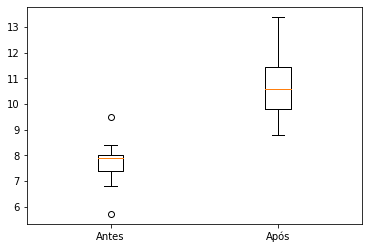

In [ ]:
plt.boxplot([x, y])
plt.xticks([1, 2], ['Antes', 'Após'])

**2** - Definir a forma da região crítica, com base na hipótese alternativa.

$RC = \{ t \in R \mid t > t_c\}$

**3** - Identificar a distribuição do estimador e obter sua estimativa.

In [ ]:
d = y-x
d

array([3.5, 0.9, 3.1, 1.7, 4. , 1.2, 4.9, 2.4, 5.4, 1.1, 2.5, 4.6])

In [ ]:
d_obs = d.mean()
s2_obs = sum((d-d.mean())**2)/(len(x)-1)

print("Média:", d_obs)
print("Variância:", s2_obs)

Média: 2.941666666666667
Variância: 2.4281060606060607


**4** - Fixar o $\alpha$ e obter a região críítica.

$t_{n-1} = t_{11}$

$t_{obs} = \frac{\bar{d}_{obs}-\mu_D}{S_{D_{obs}}/\sqrt{n}}$

In [ ]:
t_obs = (d_obs-0)/np.sqrt(s2_obs/12)
print("t observado:", t_obs)

t observado: 6.53958600696017


**5** - Concluir o teste com base na estimativa e na região crítica.

In [ ]:
from scipy import stats

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
tdist = stats.t(11)

In [ ]:
tdist.ppf(0.95)

1.7958848187036691

In [ ]:
# Calcular o t-test apropriado pela biblioteca scipy
stats.ttest_rel(y, x)

Ttest_relResult(statistic=6.539586006960168, pvalue=4.194603259445353e-05)

In [ ]:
print('pvalue=', 1-tdist.cdf(t_obs))

pvalue= 2.0003750316632818e-05


In [ ]:
stats.ttest_rel(y, x)[1]/2

2.0973016297226766e-05